In [31]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('/Users/namin/Desktop/대학/3학년 1학기/인공지능개론/AI-Class/AI-Class/week03/car_evaluation.csv', index_col=0)
df

,vhigh.1,2,2.1,small,low,unacc
vhigh,,,,,,
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...
low,low,5more,more,med,med,good
low,low,5more,more,med,high,vgood
low,low,5more,more,big,low,unacc


In [35]:
# 각 컬럼별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치가 있는 컬럼만 출력
print("\n 컬럼별 결측치 개수:")
print(missing_values[missing_values > 0])


 컬럼별 결측치 개수:
Series([], dtype: int64)


In [37]:
from sklearn.preprocessing import LabelEncoder

# 인코딩할 컬럼 리스트
categorical_cols = ['buying', 'maint', 'lug_boot', 'safety', 'class']

# 라벨 인코딩 적용
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 'doors'와 'persons' 컬럼 숫자로 변환
df['doors'] = df['doors'].replace({'5more': 5}).astype(int)
df['persons'] = df['persons'].replace({'more': 6}).astype(int)

# 변환된 데이터 확인
df

KeyError: 'buying'

In [39]:
# 컬럼명이 없어서 컬럼명 수동으로 설정

In [41]:
import pandas as pd

# 컬럼명을 직접 설정
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# CSV 파일을 헤더 없이 불러오고, 컬럼명 지정
file_path = '/Users/namin/Desktop/대학/3학년 1학기/인공지능개론/AI-Class/AI-Class/week03/car_evaluation.csv'
df = pd.read_csv(file_path, header=None, names=column_names)

# 데이터 확인
print("\n 데이터 샘플:")
df


 데이터 샘플:


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [43]:
from sklearn.preprocessing import LabelEncoder

# 인코딩할 범주형 컬럼 리스트
categorical_cols = ['buying', 'maint', 'lug_boot', 'safety', 'class']

# 라벨 인코딩(Label Encoding) 적용
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 'doors'와 'persons' 컬럼 숫자로 변환
df['doors'] = df['doors'].replace({'5more': 5}).astype(int)
df['persons'] = df['persons'].replace({'more': 6}).astype(int)

# 변환된 데이터 확인
print("\n 인코딩 완료 데이터 샘플:")
df


 인코딩 완료 데이터 샘플:


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,5,6,1,2,1
1724,1,1,5,6,1,0,3
1725,1,1,5,6,0,1,2
1726,1,1,5,6,0,2,1


In [47]:
# 데이터 준비
from sklearn.model_selection import train_test_split

# X(입력 데이터), y(타겟 변수) 분리
X = df.drop(columns=['class'])  # 'class'가 예측할 대상이므로 제거
y = df['class']

# 훈련 데이터(80%) & 테스트 데이터(20%) 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(" 훈련 데이터 크기:", X_train.shape)
print(" 테스트 데이터 크기:", X_test.shape)

 훈련 데이터 크기: (1382, 6)
 테스트 데이터 크기: (346, 6)


In [51]:
# 분류 모델 5가지 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 모델 초기화
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression"# : LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# 모델 훈련 및 예측 저장
accuracy_results = {}
y_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측
    accuracy = model.score(X_test, y_test)  # 정확도 평가
    accuracy_results[name] = accuracy
    y_preds[name] = y_pred
    print(f" {name} Accuracy: {accuracy:.4f}")

 Random Forest Accuracy: 0.9827
 Decision Tree Accuracy: 0.9855
 Logistic Regression Accuracy: 0.6908
 K-Nearest Neighbors Accuracy: 0.9104
 Support Vector Machine Accuracy: 0.7630


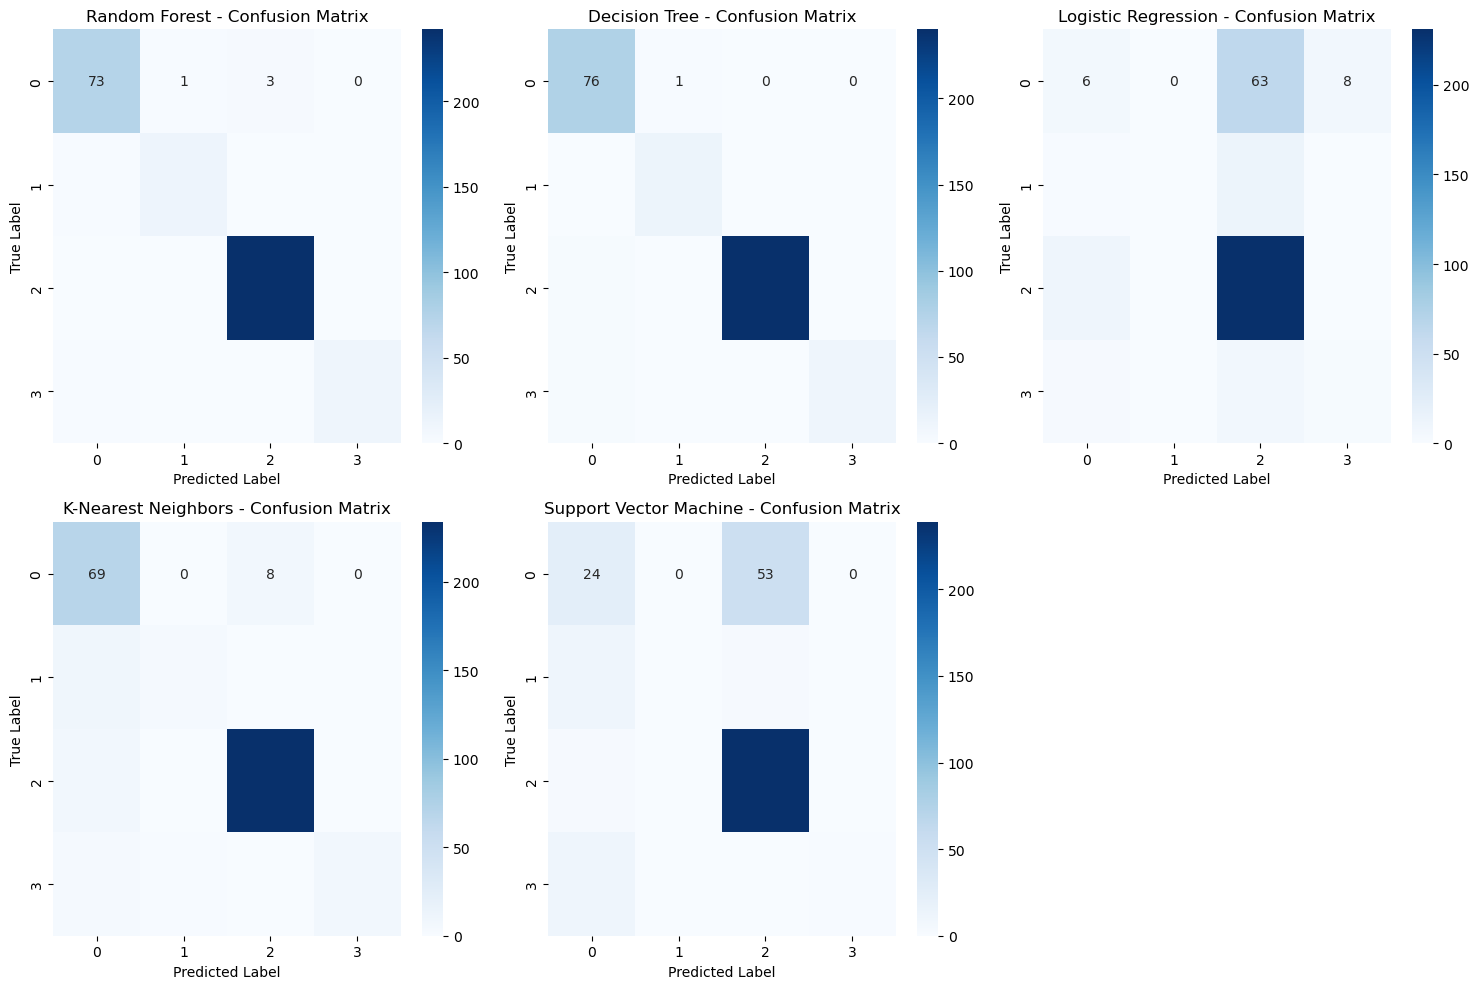

In [55]:
# confusion Matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()